In [1]:
# Resolves Plotting not available
!pip install leidenalg cairocffi pycairo --quiet
!pip install igraph --quiet
!pip install matplotlib --quiet

In [2]:
import pickle
import igraph as ig
import matplotlib

First we start by loading the graph:

In [3]:
%run _functions.ipynb

In [6]:
filename = "../networks/game_of_thrones/GoT.pkl"
g = pickle.load(open(filename, 'rb'))

We define the layout for our plots.

_NOTE:_ Since the layout position can change with every run of the following cell, run the cell only once between different plots.

In [7]:
# TODO --- REMOVE THIS LATER search for a better layout since this is a bit messy

In [8]:
layout = g.layout("fr")

Now, we can plot the initial graph

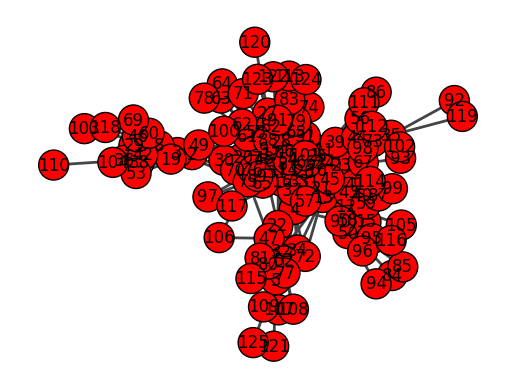

In [9]:
ig.plot(g, layout=layout, vertex_label=g.vs.indices)

Let's run the community detection on the network:

In [10]:
communities = g.community_leiden(objective_function="modularity", weights="weight")

Now we can visualize the obtained clsuters with a simple igraph visualization technique:

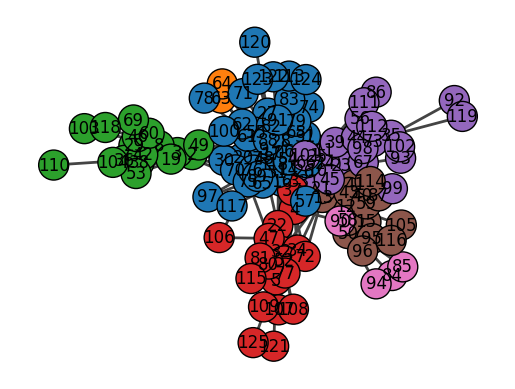

In [14]:
colors_map = matplotlib.colormaps["tab10"]
g.vs["color"] = [colors_map(cluster) for cluster in communities.membership]
ig.plot(g, layout=layout, vertex_size=30, vertex_label=g.vs.indices, bbox=(600,600))

<div style="background-color: #e6ffe6; padding: 20px; border-radius: 5px;">

* **Note on Community Significance:** Now that we've successfully identified and visualized communities within our network, a critical next step is to assess their significance. It's important to ask: are these detected structures truly meaningful, or could they have arisen by random chance? Furthermore, for algorithms with stochastic elements (like Leiden), how consistent are the results across different runs? A detailed exploration of how to test the significance of communities can be found in the notebook [here](https://mybinder.org/v2/gh/BeaMarton13/community-detection-guide-w-igraph/HEAD?urlpath=%2Fdoc%2Ftree%2Fnotebooks%2Ftest_significance_of_community.ipynb).

* **Note on Algorithms:** Various algorithms are available in *igraph* for community detection. They are categorized by their underlying principles and suited for various scenarios. For a more thorough description of these methods and recommendations on when to use each, you can refer to the notebook [here](https://mybinder.org/v2/gh/BeaMarton13/community-detection-guide-w-igraph/HEAD?urlpath=%2Fdoc%2Ftree%2Fnotebooks%2Fcommunity_detection_algorithms.ipynb).

* **Note on Visualizations:** The possibilities for visualizing **communities** are endless. For examples of various community visualization techniques, please refer to the notebook [here](https://mybinder.org/v2/gh/BeaMarton13/community-detection-guide-w-igraph/HEAD?urlpath=%2Fdoc%2Ftree%2Fnotebooks%2Fgenerating_and_visualizing_clusters.ipynb).

* **Note on Algorithm Stability:** When running community detection algorithms like Leiden, you might notice that each execution yields a different result. This variability is due to the inherent stochastic nature of the Leiden algorithm. If you're wondering how to arrive at a more stable and consistent result, consensus clustering provides the solution. A detailed description and example of how consensus clustering works can be found [here](https://mybinder.org/v2/gh/BeaMarton13/community-detection-guide-w-igraph/HEAD?urlpath=%2Fdoc%2Ftree%2Fnotebooks%2Fconsensus_clustering.ipynb).

</div>